In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle 

In [ ]:
def load_cifar10():
    f = open('/home/alvin/notebook_home/ai_lab_image/corpus/cifar-10-batches-py/data_batch_1', 'rb')
    datadict = cPickle.load(f,encoding='latin1')
    f.close()
    
    DX= datadict["data"] # 1000 x (32x32x3)
    DY= datadict['labels']
    #X = DX.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
    X = np.array(DX)
    Y = np.array(DY)
    return X,Y

In [40]:
def load_cifar10(dataset_number):

    for i in range(dataset_number):
        filename = '/home/alvin/notebook_home/ai_lab_image/corpus/cifar-10-batches-py/data_batch_' +str(i+1)
        f = open(filename, 'rb')
        datadict = cPickle.load(f,encoding='latin1')
        f.close()
    
        DX= datadict["data"] # 1000 x (32x32x3)
        DY= datadict['labels']
        #X = DX.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
        X[i*10000:(i+1)*10000] = np.array(DX)
        Y[i*10000:(i+1)*10000] = np.array(DY).reshape(len(DY),1)
        #break
    return X,Y

In [41]:
cifar_label = { '0':'airplane',
                '1':'automobile',
                '2':'bird',
                '3':'cat',
                '4':'deer',
                '5':'dog',
                '6':'frog',
                '7':'horse',
                '8':'ship',
                '9':'truck'}

In [42]:
dataset_number = 2
X = np.zeros(shape=(dataset_number*10000,32*32*3),dtype='uint8')
Y = np.zeros(shape=(dataset_number*10000,1), dtype='uint8')
X,Y = load_cifar10(dataset_number)

In [43]:
Y[10000:10010]

array([[1],
       [6],
       [6],
       [8],
       [8],
       [3],
       [4],
       [6],
       [0],
       [6]], dtype=uint8)

In [37]:
# display basic information 
print('dataset count = ' + str(len(X)))
for i in range(10):
    print('number of class '+ str(i) + ': ' + str(Y[np.where(Y==i)].size))

dataset count = 20000
number of class 0: 1989
number of class 1: 1981
number of class 2: 2042
number of class 3: 2011
number of class 4: 2009
number of class 5: 1925
number of class 6: 2038
number of class 7: 2027
number of class 8: 2012
number of class 9: 1966


KeyError: '[6]'

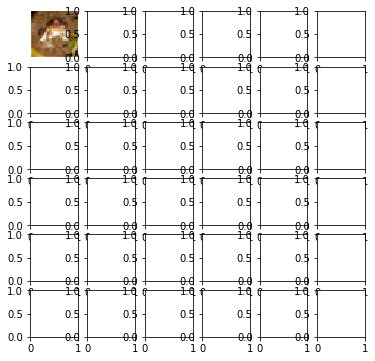

In [39]:
# display cifar image
#Visualizing CIFAR 10 method 2
X3 = X.reshape(10000*dataset_number, 3, 32, 32).transpose(0,2,3,1)
pic_dim = 6
fig, axes1 = plt.subplots(pic_dim,pic_dim,figsize=(6,6))
for i in range(pic_dim*pic_dim):
    #print('i/pic_dim: ' + str(i/pic_dim) + 'i%pic_dim: ' + str(i%pic_dim))
    axes1[int(i/pic_dim)][int(i%pic_dim)].set_axis_off()
    axes1[int(i/pic_dim)][int(i%pic_dim)].imshow(X3[i])
    axes1[int(i/pic_dim)][int(i%pic_dim)].annotate(cifar_label[str(Y[i])],xy=(0.2,0.6))

In [ ]:
# display cifar image with gray
#Visualizing CIFAR 10 method 2
XG = X.reshape(10000, 3, 1024).transpose(0,2,1).astype("uint8") #1000 x 3 x 1024 --> 1000 x 1024 x 3
XG = np.mean(XG,axis=2)                                         #1000 x 1024
XG = XG.reshape(10000, 32, 32)
pic_dim = 6
fig, axes1 = plt.subplots(pic_dim,pic_dim,figsize=(6,6))
for i in range(pic_dim*pic_dim):
    #print('i/pic_dim: ' + str(i/pic_dim) + 'i%pic_dim: ' + str(i%pic_dim))
    axes1[int(i/pic_dim)][int(i%pic_dim)].set_axis_off()
    axes1[int(i/pic_dim)][int(i%pic_dim)].imshow(XG[i], cmap='gray')
    axes1[int(i/pic_dim)][int(i%pic_dim)].annotate(cifar_label[str(Y[i])],xy=(0.2,0.6))

In [ ]:
###############################################################
#   knn main code
###############################################################

In [ ]:
XG = X.reshape(10000, 3, 1024).transpose(0,2,1).astype("uint8") #10000 x 3 x 1024 --> 10000 x 1024 x 3
XG = np.mean(XG,axis=2)                                         #10000 x 1024

# training set and testing test
t_rate   = 0.8
train_set_num = int(len(X)*t_rate)
train_set   = XG[:train_set_num]
train_label = Y[:train_set_num]
test_set    = XG[train_set_num+1:]
test_label  = Y[train_set_num+1:]

In [ ]:
def l1_dist(input_vec, train_set):
    l1_formula = lambda x: sum(abs(input_vec - x))
    l1_dist_vec= l1_formula(train_set)
    return l1_dist_vec

def l2_dist(input_vec, train_set):
    l2_formula = lambda x: np.sqrt(sum((input_vec - x) ** 2))
    l2_dist_vec= l2_formula(train_set)
    return l2_dist_vec

In [ ]:
k = 3
correct_num = 0
pred = np.zeros(shape=(len(test_set),1),dtype='uint8')
for i in range(len(test_set)):
    test_sample = test_set[i]
    dict_vec    = l1_dist(test_sample, train_set)
    idx         = np.argpartition(dict_vec,k)[0:k]
    vote        = train_label[idx[0:k]]
    #tmp = np.bincount(vote)
    #print(str(np.bincount(vote)))
    #print(str(np.argmax(tmp)))
    pred[i]     = np.argmax(np.bincount(vote))
    #if i > 100: break
    print(str(test_label[i]) + ' , ' + str(vote) + ' --> ' + str(pred[i]))
    
    if test_label[i] == train_label[idx[0]]:
        correct_num += 1

accuracy = correct_num/len(test_set)
print('knn accuarcy is ' + str(float("{0:.3f}".format(accuracy*100)))+'%')

In [ ]:
k= 1
test_sample = test_set[0]
l1_dict_vec = l1_dist(test_sample,train_set)
idx = np.argpartition(l1_dict_vec,k)
#
print(Y[train_set_num+0])
print(Y[train_set_num+idx[0]])

In [ ]:
int_v = test_set[0]/255
trn_v = train_set[0]/255
print(int_v)
print(trn_v)

In [ ]:
print('np.linalg.norm = ' + str(np.linalg.norm((int_v - trn_v), ord=2)))
dist_l1 = sum(abs(int_v - trn_v))
print('sum(abs(a-b)) = ' + str(dist_l1))


In [ ]:
int_v = np.array([1,1,1,1,1])
tring_set = np.array([[2,2,2,2,2],[3,3,3,3,3],[4,4,4,4,4],[5,5,5,5,5]])
#dist_lambda = lambda x: np.linalg.norm((int_v - x), ord=1)
dist_lambda = lambda x: sum(abs(int_v - x))
#dist_vec = map{lamda x: np.linalg.norm((int_v - x), ord=1),train_set}
dist_vec = dist_lambda(tring_set)
dist_vec